Data has been written to 'output.txt'.
Data has been written to 'output.txt'.
Data has been written to 'output.txt'.
Delamination data has been written to 'output.txt'.


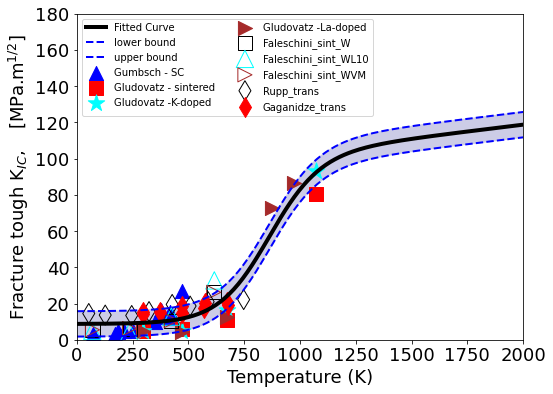

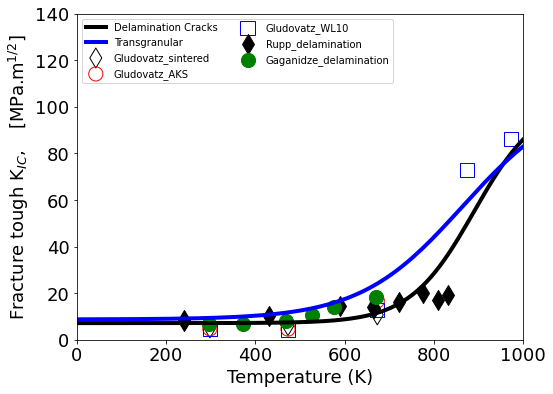

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
k_error = 7
# Data for Temperature (K) and Fracture tough (K in MPa m^1/2)

# (1) Gumsch -SC Journal of Nuclear Materials 323 (2003) 304–312
Gumsch_temp = np.array([75.23, 171.69, 186.04, 184.88, 211.74, 251.86,
                        296.85, 375.07, 420.73, 72.14, 294.46, 350.80, 376.03, 422.88, 419.41, 469.54])
Gumsch_tough = np.array([2.10, 3.33, 4.04, 4.64, 5.00, 5.09, 6.08,
                        16.36, 11.80,3.30, 8.59, 9.80, 12.49, 14.18, 15.46, 27.15])

# (2) Gludovatz Int. Journal of Refractory Metals and Hard Materials 28 (2010) 674–678
Gludovatz_sintered_W_temp = np.array([25, 200, 400, 800]) + 273.15
Gludovatz_sintered_W_tough = np.array([5.1, 6.1, 10.7, 80.5])
Gludovatz_AKS_W_temp = np.array([25, 200, 400, 800]) + 273.15
Gludovatz_AKS_W_tough = np.array([4.7, 4.6, 16.7, 93])
Gludovatz_WL10_W_temp = np.array([25, 200, 400, 600, 700]) + 273.15
Gludovatz_WL10_W_tough = np.array([4.7, 4.3, 12.8, 72.9, 86.3])

# (3) M. Faleschini_sint et al. / Journal of Nuclear Materials 367–370 (2007) 800–805
Faleschini_sint_W_temp = np.array([70.06, 236.46, 423.20, 613.40])
Faleschini_sint_W_tough = np.array([5.50, 6.17, 10.59, 26.18])
Faleschini_sint_WL10_temp = np.array([69.58, 235.03, 423.58, 616.11])
Faleschini_sint_WL10_tough = np.array([5.03, 4.27, 12.81, 32.78])
Faleschini_sint_WVM_temp = np.array([70.06, 236.46, 423.20, 613.40])
Faleschini_sint_WVM_tough = np.array([5.50, 6.17, 10.59, 26.18])

# (4) D. Rupp et al., Fracture toughness and microstructural characterization of polycrystalline rolled tungsten,
# International Journal of Refractory Metals and Hard Materials,
# Volume 28, Issue 6, 2010, Pages 669-673, https://doi.org/10.1016/j.ijrmhm.2010.05.006.
Rupp_trans_temp = np.array([53.58, 127.32, 245.99, 323.61, 427.30, 507.63, 588.52, 747.58])
Rupp_trans_tough = np.array([14.52, 13.65, 13.42, 15.59, 19.53, 18.63, 21.02, 22.20])
#  Delamination cracks
Rupp_delam_temp = np.array([239.13, 663.29, 721.12, 776.47, 239.19, 431.06, 588.67,
                            666.48, 830.43, 808.82])
Rupp_delam_tough = np.array([8.45, 13.96, 16.23, 20.22, 8.08, 10.17, 14.59,
                            13.49, 19.41, 17.27])

# (5) E. Gaganidze et al., Journal of Nuclear Materials 446 (2014) 240–245
Gaganidze_trans_temp = np.array([294.78, 295.67, 372.08, 473.22, 471.33,
                                 572.51, 568.34, 671.32, 675.86])
Gaganidze_trans_tough = np.array([15.29, 14.17, 15.43, 18.45, 15.06,
                                  20.36, 17.30, 20.87, 18.96])
Gaganidze_delam_temp = np.array([295.08, 372.38, 468.46, 527.05, 575.14, 670.82])
Gaganidze_delam_tough = np.array([6.97, 6.58, 8.15, 10.44, 14.13, 18.47])

# Add up all data
all_temps = np.concatenate((Gumsch_temp, Gludovatz_sintered_W_temp,
                            Gludovatz_AKS_W_temp, Gludovatz_WL10_W_temp,
                            Faleschini_sint_W_temp, Faleschini_sint_WL10_temp,
                            Faleschini_sint_WVM_temp, Rupp_trans_temp, Gaganidze_trans_temp))
all_tough = np.concatenate((Gumsch_tough, Gludovatz_sintered_W_tough,
                            Gludovatz_AKS_W_tough, Gludovatz_WL10_W_tough,
                            Faleschini_sint_W_tough, Faleschini_sint_WL10_tough,
                            Faleschini_sint_WVM_tough, Rupp_trans_tough, Gaganidze_trans_tough))

delam_temps = np.concatenate((Rupp_delam_temp, Gaganidze_delam_temp, Gludovatz_WL10_W_temp,
                              Gludovatz_AKS_W_temp, Gludovatz_sintered_W_temp))
delam_tough = np.concatenate((Rupp_delam_tough, Gaganidze_delam_tough, Gludovatz_WL10_W_tough,
                              Gludovatz_AKS_W_tough, Gludovatz_sintered_W_tough))


# Define the constrained sigmoid function
def sigmoid(T, a, c, d):
    return (80 + 0.015 * T) / (1 + np.exp(-c * (T - d))) + a


# Initial parameter guess
initial_guess = [100, 0.01, 700]  # Just as an initial guess


# Perform the curve fitting
popt, pcov = curve_fit(sigmoid, all_temps, all_tough, p0=initial_guess)

# Generate fitted data for single crystal
T_fit = np.linspace(0, 2000, 200)
K_fit = sigmoid(T_fit, *popt)
K_fit_upper = K_fit+k_error
K_fit_lower = K_fit-k_error
# Goodness-of-fit parameters
# Calculate the residuals
residuals = all_tough - sigmoid(all_temps, *popt)

# Calculate the total sum of squares (TSS)
ss_tot = np.sum((all_tough - np.mean(all_tough)) ** 2)

# Calculate the residual sum of squares (RSS)
ss_res = np.sum(residuals ** 2)

# Calculate R-squared
r_squared = 1 - (ss_res / ss_tot)

# Calculate the reduced chi-squared
# Degrees of freedom: number of observations - number of parameters
degrees_of_freedom = len(Gumsch_temp) - len(popt)
reduced_chi_squared = ss_res / degrees_of_freedom

# Print the optimized and the goodness-of-fit parameters

# Data to be written
data = {
    'Optimized parameters [a, c, d]:': popt,
    f"R-squared:": {r_squared},
    f"Reduced chi-squared:": {reduced_chi_squared}
}

# Perform the curve fitting for delamination cracks
popt_delam, pcov = curve_fit(sigmoid, delam_temps, delam_tough, p0=initial_guess)

# Generate fitted data for delamination cracks
T_fit_delam = np.linspace(0, 2000, 200)
K_fit_delam = sigmoid(T_fit_delam, *popt_delam)
K_fit_upper_delam = K_fit_delam+k_error
K_fit_lower_delam = K_fit_delam-k_error

data_delam = {
    'Optimized parameters fro trans cracks [a, c, d]:': popt_delam,
    f"R-squared:": {r_squared},
    f"Reduced chi-squared:": {reduced_chi_squared}
}

# Open the file for writing ('w' mode)
with open('output.txt', 'w') as file:
    # Write formatted text to the file
    for key, value in data.items():
        file.write(f'{key}: {value}\n')
        print("Data has been written to 'output.txt'.")
    for key, value in data_delam.items():
        file.write(f'{key}: {value}\n')

print("Delamination data has been written to 'output.txt'.")


# Plot the original data
# Set global font size
plt.rcParams.update({'font.size': 16})  # You can adjust the size as needed
f_legend = 10
f_ticks = 18
f_labels = 18
f_title = 20

# plt.figure(1)
plt.figure(num=1, figsize=(8, 6))

# Plot the fitted curve
plt.plot(T_fit, K_fit, color='black', label='Fitted Curve', linewidth=4)
plt.plot(T_fit, K_fit_lower, color='blue', label='lower bound', linewidth=2, linestyle='--' )
plt.plot(T_fit, K_fit_upper, color='blue', label='upper bound', linewidth=2, linestyle='--')
# Creating the fill
inBetween = np.concatenate([K_fit_upper, np.flipud(K_fit_lower)])
x2 = np.concatenate([T_fit, np.flipud(T_fit)])
plt.fill(x2, inBetween, color=[0.8, 0.8, 0.9])

plt.scatter(Gumsch_temp, Gumsch_tough,
            color='blue', label='Gumbsch - SC', s=200, marker='^')
plt.scatter(Gludovatz_sintered_W_temp, Gludovatz_sintered_W_tough,
            color='red', label='Gludovatz - sintered', s=200, marker='s')
plt.scatter(Gludovatz_AKS_W_temp, Gludovatz_AKS_W_tough,
            color='cyan', label='Gludovatz -K-doped', s=300, marker='*')
plt.scatter(Gludovatz_WL10_W_temp, Gludovatz_WL10_W_tough,
            color='brown', label='Gludovatz -La-doped', s=200, marker='>')
plt.scatter(Faleschini_sint_W_temp, Faleschini_sint_W_tough,
            color='black', label='Faleschini_sint_W', s=200, marker='s', facecolors='none')
plt.scatter(Faleschini_sint_WL10_temp, Faleschini_sint_WL10_tough,
            color='cyan', label='Faleschini_sint_WL10', s=300, marker='^', facecolors='none')
plt.scatter(Faleschini_sint_WVM_temp, Faleschini_sint_WVM_tough,
            color='brown', label='Faleschini_sint_WVM', s=200, marker='>', facecolors='none')
plt.scatter(Rupp_trans_temp, Rupp_trans_tough,
            color='black', label='Rupp_trans', s=200, marker='d', facecolors='none')
plt.scatter(Gaganidze_trans_temp, Gaganidze_trans_tough,
            color='red', label='Gaganidze_trans', s=200, marker='d')

# Label the axes and the plot
plt.xlabel('Temperature (K)', fontsize=f_labels)
plt.ylabel("Fracture tough K$_{IC},~~$ [MPa.m$^{1/2}$]", fontsize=f_labels)
# plt.title('Constrained Sigmoidal Fit of Fracture tough vs. Temperature', fontsize=f_title)

# Customize the plot
plt.grid(False)
plt.xlim(0, 2000)
plt.ylim(0, 180)

# Display the legend with a specific font size
plt.legend(ncol=2, fontsize=f_legend, loc='upper left')

# Optionally, if you want to set the tick labels size:
plt.xticks(fontsize=f_ticks)
plt.yticks(fontsize=f_ticks)


# plt.figure(2) for delamination cracks
plt.figure(num=2, figsize=(8, 6))

# Plot the fitted curve for delamination cracks
plt.plot(T_fit_delam, K_fit_delam, color='black', label='Delamination Cracks', linewidth=4)
plt.plot(T_fit, K_fit, color='blue', label='Transgranular', linewidth=4)

plt.scatter(Gludovatz_sintered_W_temp, Gludovatz_sintered_W_tough,
            color='black', label='Gludovatz_sintered', s=200, marker='d', facecolors='none')
plt.scatter(Gludovatz_AKS_W_temp, Gludovatz_AKS_W_tough,
            color='red', label='Gludovatz_AKS', s=200, marker='o', facecolors='none')
plt.scatter(Gludovatz_WL10_W_temp, Gludovatz_WL10_W_tough,
            color='blue', label='Gludovatz_WL10', s=200, marker='s', facecolors='none')
plt.scatter(Rupp_delam_temp, Rupp_delam_tough,
            color='black', label='Rupp_delamination', s=200, marker='d')
plt.scatter(Gaganidze_delam_temp, Gaganidze_delam_tough,
            color='green', label='Gaganidze_delamination', s=200, marker='o')

# Label the axes and the plot
plt.xlabel('Temperature (K)', fontsize=f_labels)
plt.ylabel("Fracture tough K$_{IC},~~$ [MPa.m$^{1/2}$]", fontsize=f_labels)
# plt.title('Constrained Sigmoidal Fit of Fracture tough vs. Temperature', fontsize=f_title)

# Customize the plot
plt.grid(False)
plt.xlim(0, 1000)
plt.ylim(0, 140)

# Display the legend with a specific font size
plt.legend(ncol=2, fontsize=f_legend, loc='upper left')

# Optionally, if you want to set the tick labels size:
plt.xticks(fontsize=f_ticks)
plt.yticks(fontsize=f_ticks)

# Show the plot
plt.show()

In [2]:
import pandas as pd
print(pd.__version__)


2.1.4


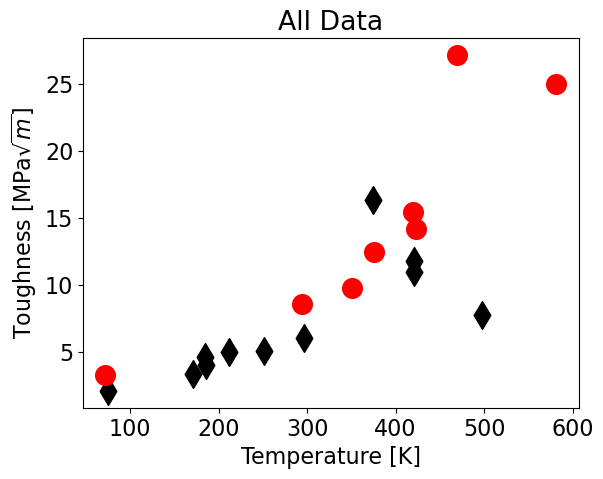

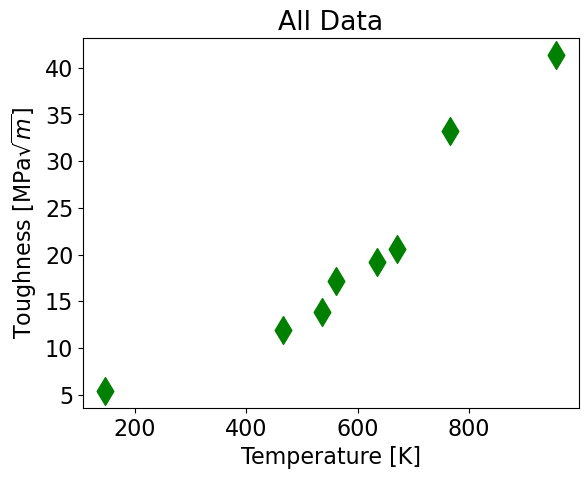

In [11]:
import pandas as pd

# Specify the file path
excel_file = r"C:\Users\Owner\My Drive\Research\Material Databases\Computer Codes\Jupyter\W_fracture_toughness_data.xlsx"

# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(excel_file, sheet_name=None)

# You can access individual DataFrames by their sheet names
gumbsch_df = all_sheets['Gumbsch']

# Convert the 'temperature' & toughness columns to numeric, ignoring non-numeric values
t_gumbsch = pd.to_numeric(gumbsch_df['temperature'], errors='coerce')
K_gumbsch = pd.to_numeric(gumbsch_df['toughness'], errors='coerce')
t_gumbsch1 = pd.to_numeric(gumbsch_df['temperature1'], errors='coerce')
K_gumbsch1 = pd.to_numeric(gumbsch_df['toughness1'], errors='coerce')


# Filter out NaN values
t_gumbsch = t_gumbsch[~t_gumbsch.isna()]
K_gumbsch = K_gumbsch[~K_gumbsch.isna()]
t_gumbsch1 = t_gumbsch1[~t_gumbsch1.isna()]
K_gumbsch1 = K_gumbsch1[~K_gumbsch1.isna()]

t = t_gumbsch+t_gumbsch1
K = K_gumbsch+K_gumbsch1

# Create a new figure
plt.figure()

# Plot your data or add elements to the figure
plt.scatter(t_gumbsch, K_gumbsch,
            color='black', label='Gumbsch Data', s=200, marker='d')

plt.scatter(t_gumbsch1, K_gumbsch1,
            color='red', label='Gumbsch Data1', s=200, marker='o')

# Customize the plot if needed
plt.xlabel('Temperature [K]')
plt.ylabel(r'Toughness [MPa$\sqrt{m}$]')
plt.title('All Data')

# Show the plot
plt.show()

# Plot your data or add elements to the figure
plt.scatter(t, K,
            color='green', label='All Gumbsch Data', s=200, marker='d')

# Customize the plot if needed
plt.xlabel('Temperature [K]')
plt.ylabel(r'Toughness [MPa$\sqrt{m}$]')
plt.title('All Data')

# Show the plot
plt.show()

# Fracture Toughness of Tungsten
## Isotropic Toughness
The fracture toughness is represented by a sigmoid function defined as:

$
   K_{IC}(T, a, c, d) = \frac{80 + 0.015 \cdot T}{1 + \exp{-c(T - d)}} + a 
$

where (T) is the temperature, (a), (c), and (d) are parameters of the function.  Fracture toughness data and curve fits are shown in Fig. \ref{fig:K_IC_fit_iso} for isotropic properties and in Fig. \ref{fig:W_toughness_anisotropic} for W deformed before testing, either by forging or rolling, and exhibiting delamination-type cracks.  The fitting parameters for $K_{IC}$ are shown in Table \ref{tab:K_IC_parameters} for isotropic properties and Table \ref{tab:K_IC_parameters_delam} for delamination cracks.

Effects of Prior Deformation Anisotropy 

| Parameter           | Value  |
|---------------------|--------|
| **a**               | 7.16   |
| **c**               | 0.0139 |
| **d**               | 886    |
| **R^2**             | 0.886  |
| $\uced $   \chi^2\) | 1

90    |
